The purpose of this notebook is to demonstrate how to refine with locally defined GSAS-II functions.



# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path += ["../../../easyXRD"]


import easyxrd
from easyxrd.core import exrd

import xarray as xr
import numpy as np
import pybaselines
from copy import deepcopy



Checking required packages:

---numpy package with version 1.26.4 is available and can be imported 
---pyFAI package with version 2024.5.0 is available and can be imported 
---scipy package with version 1.14.0 is available and can be imported 
---pymatgen package with version 2024.8.9 is available and can be imported 
---xarray package with version 2024.7.0 is available and can be imported 
---ipympl package with version 0.9.4 is available and can be imported 
---mp_api package with version 0.42.1 is available and can be imported 
---pandas package with version 2.2.2 is available and can be imported 
---fabio package with version 2024.4.0 is available and can be imported 


Imported easyxrd with the following configuration:

- easyxrd_scratch_path : /home/mt/.easyxrd_scratch
- gsasii_lib_path : /home/mt/g2full/GSAS-II/GSASII
- mp_api_key : dHgNQRNYSpuizBPZYYab75iJNMJYCklB



In [3]:
# importing matplotlib for plots.
%matplotlib widget
import matplotlib.pyplot as plt

plt.rcParams.update({"figure.max_open_warning": 0})
plt.rcParams["figure.constrained_layout.use"] = True

In [4]:
%%time


# import pyFAI,fabio
# ai_file = 'tiff_files/_calibration.poni'
# mask_file = 'tiff_files/_mask.edf'
# ai = pyFAI.load(ai_file)
# mask = fabio.open(mask_file).data

sample_Kapton = exrd()
# sample_Kapton.load_xrd_data(from_tiff_file='tiff_files/Kapton.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_Kapton.export_ds(save_dir='nc_files',save_name='Kapton.nc')
sample_Kapton.load_xrd_data(from_nc_file="nc_files/Kapton.nc", plot=False)

sample_Air = exrd()
# sample_Air.load_xrd_data(from_tiff_file='tiff_files/Air_scattering.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_Air.export_ds(save_dir='nc_files',save_name='Air.nc')
sample_Air.load_xrd_data(from_nc_file="nc_files/Air.nc", plot=False)

sample_LaB6 = exrd()
# sample_LaB6.load_xrd_data(from_tiff_file='tiff_files/NIST-LaB6.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_LaB6.export_ds(save_dir='nc_files',save_name='NIST-LaB6.nc')
sample_LaB6.load_xrd_data(from_nc_file="nc_files/NIST-LaB6.nc", plot=False)

sample_CeO2 = exrd()
# sample_CeO2.load_xrd_data(from_tiff_file='tiff_files/NIST-CeO2.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_CeO2.export_ds(save_dir='nc_files',save_name='NIST-CeO2.nc')
sample_CeO2.load_xrd_data(from_nc_file="nc_files/NIST-CeO2.nc", plot=False)

sample_mix = exrd()
# sample_mix.load_xrd_data(from_tiff_file='tiff_files/NIST-LaB6-CeO2-mix.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_mix.export_ds(save_dir='nc_files',save_name='NIST-LaB6-CeO2-mix.nc')
sample_mix.load_xrd_data(from_nc_file="nc_files/NIST-LaB6-CeO2-mix.nc", plot=False)

phases_LaB6 = [
    {
        "mp_id": "none",
        "cif": "_cifs/LaB6_a=4.1568_NIST_value.cif",
        "label": "LaB6",
        "scale": 1.00,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_CeO2 = [
    {
        "mp_id": "none",
        "cif": "_cifs/CeO2_a=5.4113_NIST_value.cif",
        "label": "CeO2",
        "scale": 1.00,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_mix = [
    {
        "mp_id": "none",
        "cif": "_cifs/LaB6_a=4.1568_NIST_value.cif",
        "label": "LaB6",
        "scale": 1.00,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/CeO2_a=5.4113_NIST_value.cif",
        "label": "CeO2",
        "scale": 1.00,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

CPU times: user 92.9 ms, sys: 3.96 ms, total: 96.8 ms
Wall time: 95 ms



 ⏩--1st refinement with LeBail is completed: Rwp/GoF is 11.449/0.162 on 1 variable(s) 
 ✅--After setting LeBail refinement to True, Rwp/GoF is now 12.110/0.171 on 1 variable(s) (was 11.449(5.77%)/0.162(5.77%❗))
 ✅--Phase fractions of phases are refined. Rwp/GoF is now 12.110/0.171 on 1 variable(s) (was 12.110(-0.00%)/0.171(-0.00%❗))
 ✅--U property of site La0 of LaB6 phase is refined. Rwp/GoF is now 11.752/0.166 on 2 variable(s) (was 12.110(-2.95%)/0.171(-2.94%))
CPU times: user 9.42 s, sys: 43.1 ms, total: 9.46 s
Wall time: 9.62 s


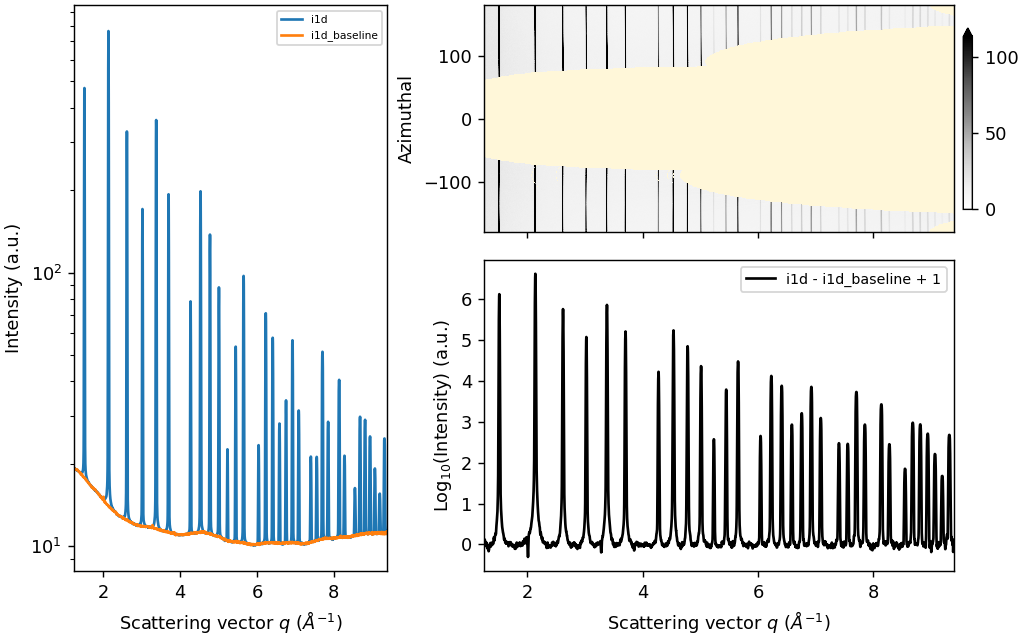

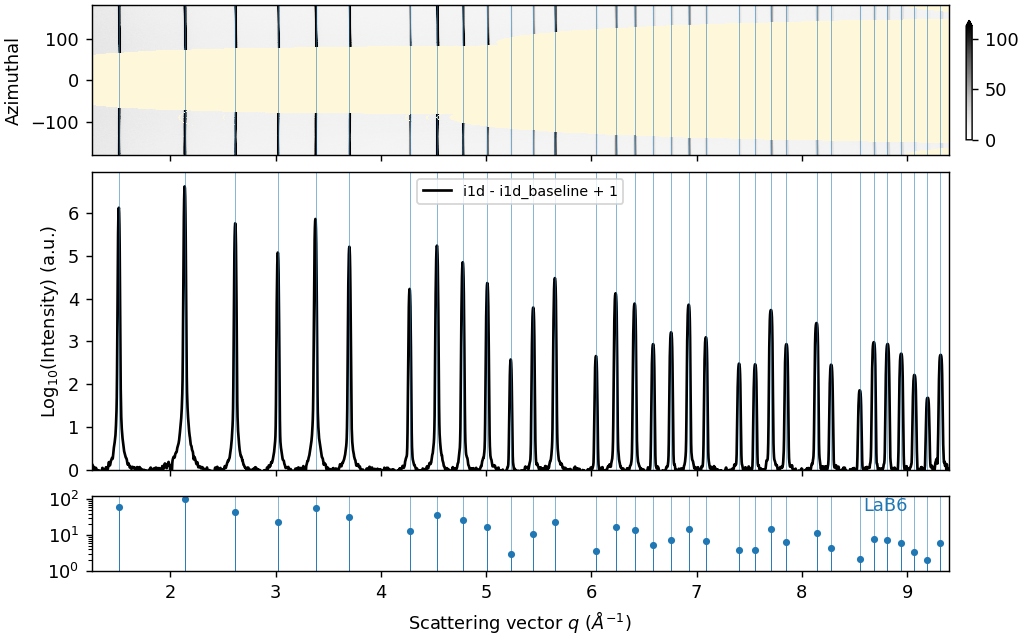

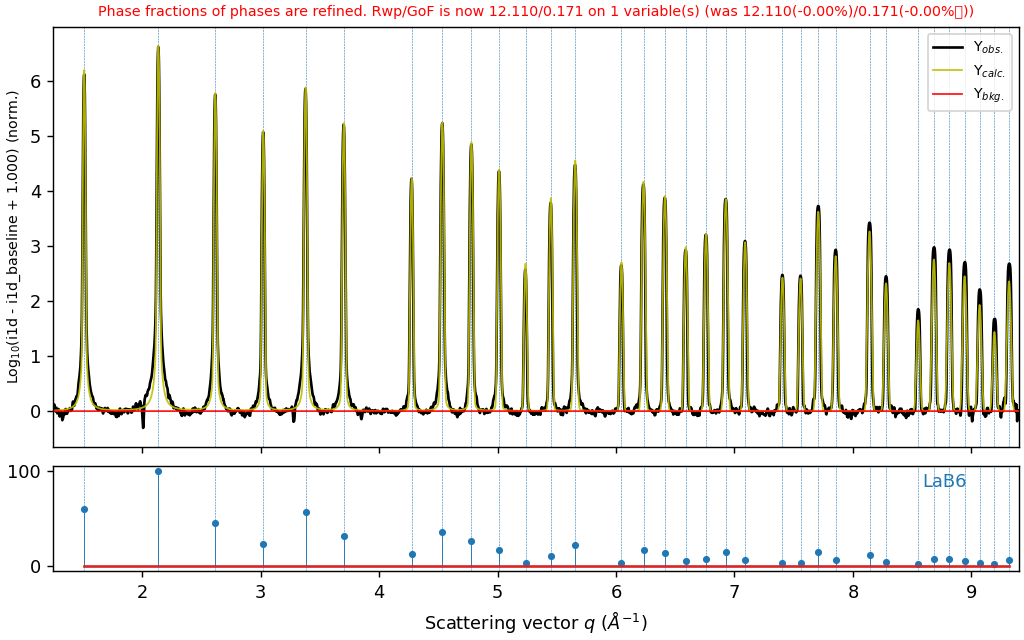

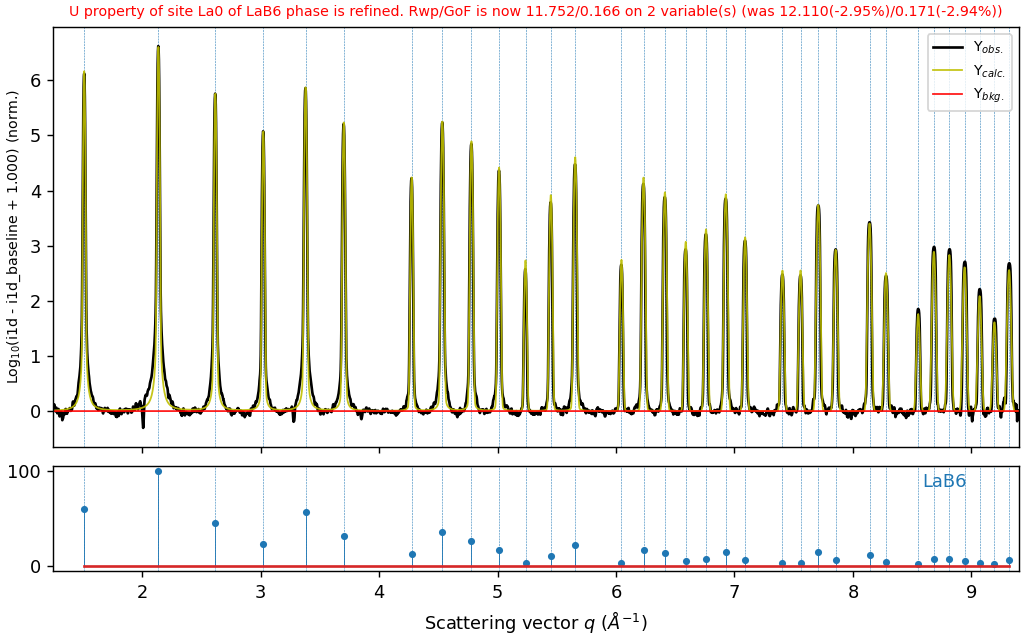

In [23]:
%%time

sample = deepcopy(sample_LaB6)
phases = phases_LaB6

sample.get_baseline(
    input_bkg=sample_Kapton,
    arpls_lam=1e6,
    use_arpls=True,
    get_i2d_baseline = False,
    use_i2d_baseline = False,
    roi_radial_range=[1.25, 9.4],
    # roi_azimuthal_range=(20,50),
    spotty_data_correction=False,
    spotty_data_correction_threshold=2,
    plot=True,
)
sample.load_phases(phases=phases, plot=True)

# Refinements
sample.setup_gsas2_refiner(instprm_from_gpx="gsas_instprms.gpx",plot=False,normalize=True)
sample.set_LeBail(set_to=False, refine=True, plot=False)
sample.refine_phase_fractions(plot=True,set_to_false_after_refinement=False)
sample.refine_site_property(phase_ind=0,site_ind=0,refinement_flags='U',set_to_false_after_refinement=False)


 ⏩--1st refinement with LeBail is completed: Rwp/GoF is 14.357/0.191 on 1 variable(s) 
 ✅--Cell parameters of all phases are refined. Rwp/GoF is now 6.568/0.088 on 2 variable(s) (was 14.357(-54.25%)/0.191(-54.24%✨))
 ✅--Strain broadening of all phases are refined. Rwp/GoF is now 6.350/0.085 on 2 variable(s) (was 6.568(-3.32%)/0.088(-3.32%))
 ✅--Size broadening of all phases are refined. Rwp/GoF is now 6.180/0.082 on 2 variable(s) (was 6.350(-2.68%)/0.085(-2.68%))
 ✅--After setting LeBail refinement to True, Rwp/GoF is now 8.242/0.110 on 1 variable(s) (was 6.180(33.37%)/0.082(33.35%❗))
 ✅--Phase fractions of phases are refined. Rwp/GoF is now 8.242/0.110 on 1 variable(s) (was 8.242(-0.00%)/0.110(-0.00%❗))
 ✅--U property of site Ce0 of CeO2 phase is refined. Rwp/GoF is now 6.627/0.088 on 2 variable(s) (was 8.242(-19.60%)/0.110(-19.59%✨))
 ✅--U property of site O1 of CeO2 phase is refined. Rwp/GoF is now 6.602/0.088 on 3 variable(s) (was 6.627(-0.37%)/0.088(-0.36%❗))
CPU times: user 8.64

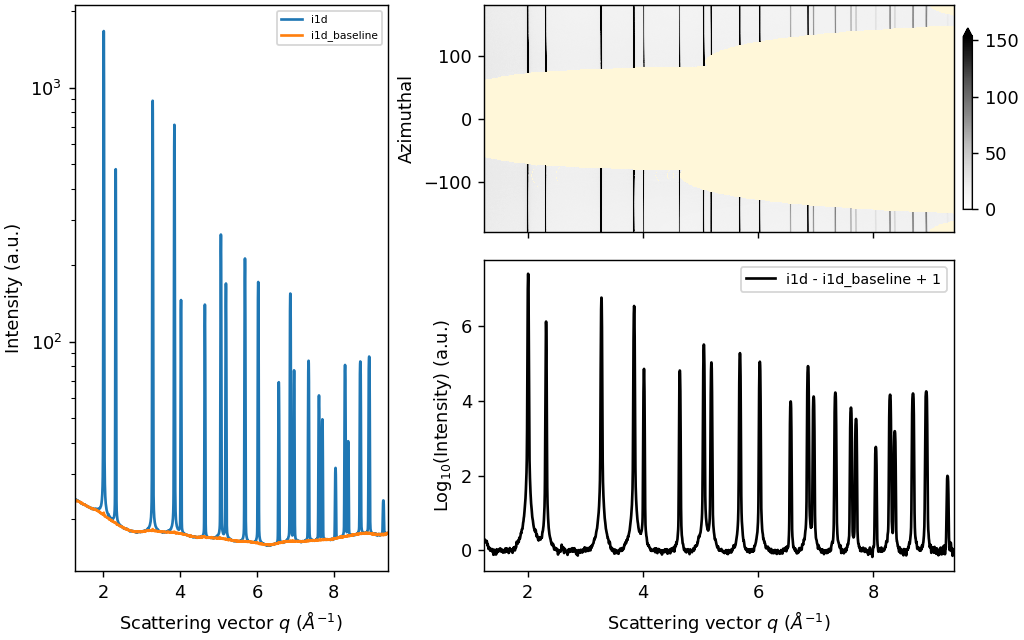

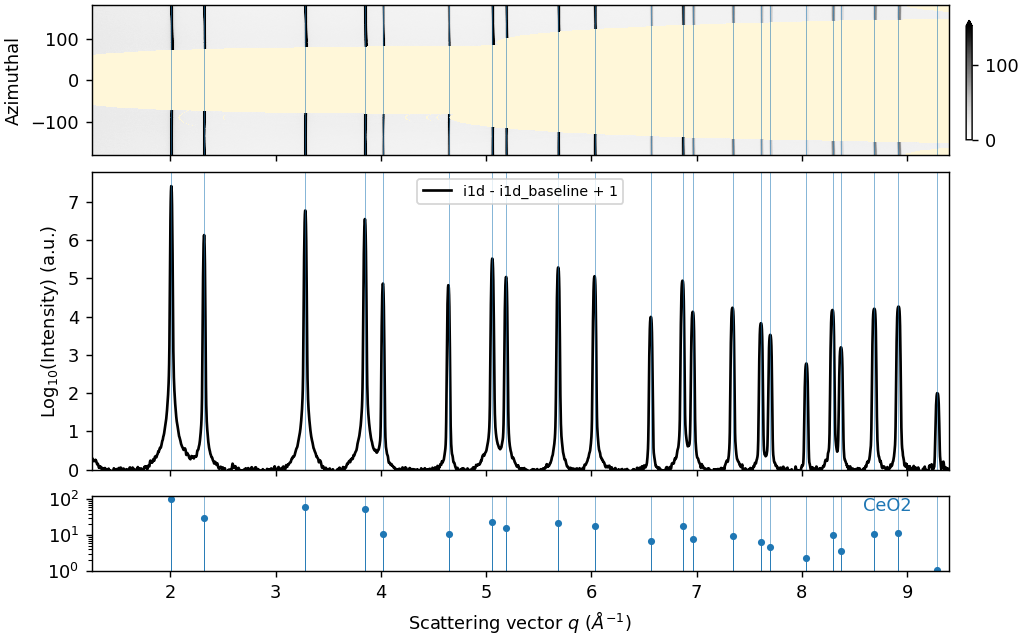

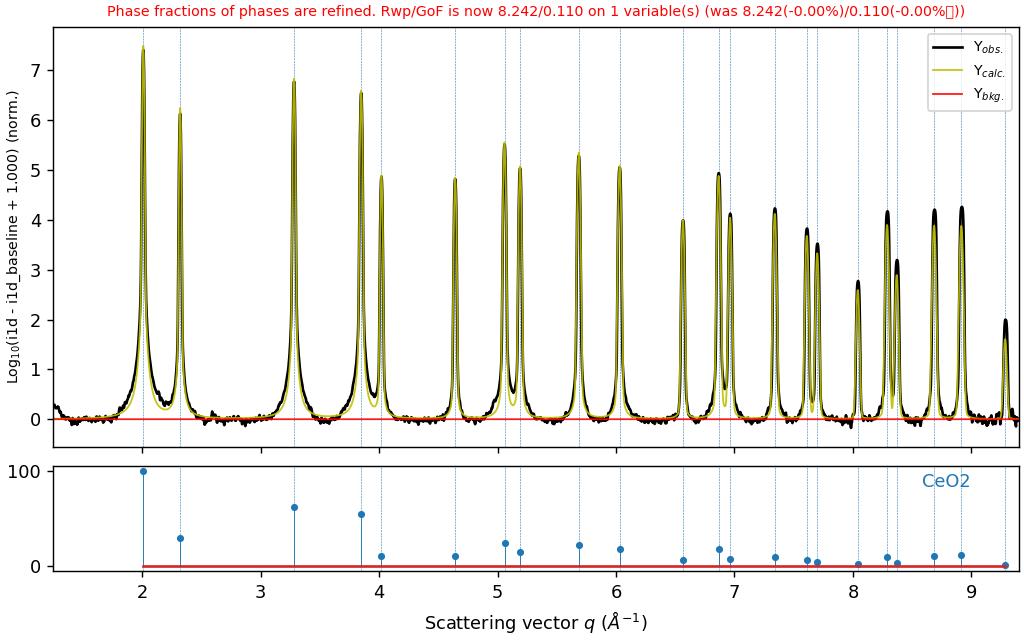

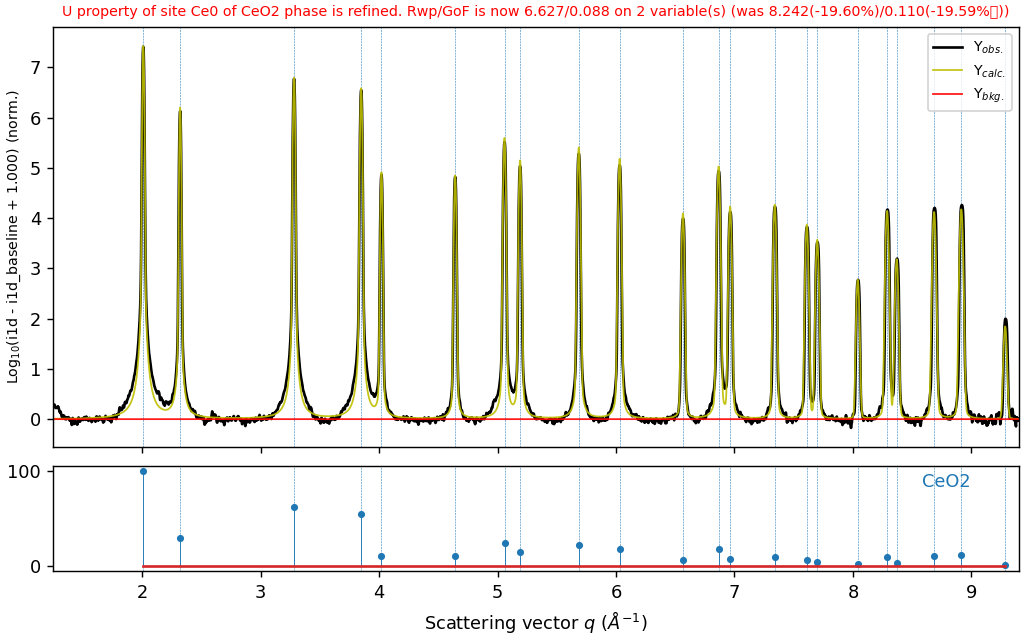

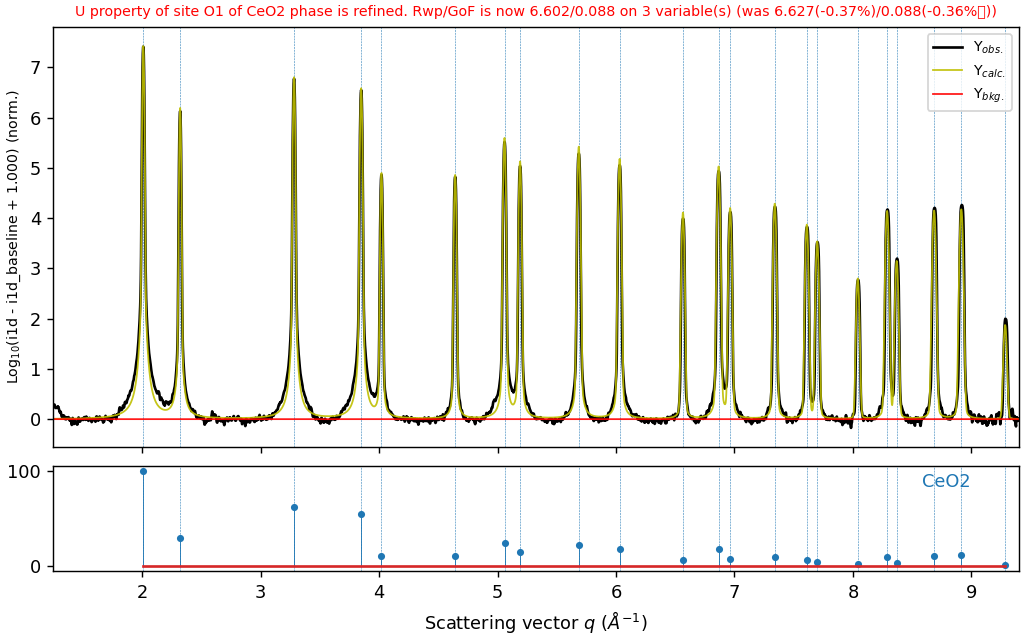

In [21]:
%%time

sample = deepcopy(sample_CeO2)
phases = phases_CeO2

sample.get_baseline(
    input_bkg=sample_Kapton,
    arpls_lam=1e6,
    use_arpls=True,
    get_i2d_baseline = False,
    use_i2d_baseline = False,
    roi_radial_range=[1.25, 9.4],
    # roi_azimuthal_range=(20,50),
    spotty_data_correction=False,
    spotty_data_correction_threshold=2,
    plot=True,
)
sample.load_phases(phases=phases, plot=True)

# Refinements
sample.setup_gsas2_refiner(instprm_from_gpx="gsas_instprms.gpx",plot=False,normalize=True)
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()

sample.set_LeBail(set_to=False, refine=True, plot=False)
sample.refine_phase_fractions(plot=True,set_to_false_after_refinement=False)
sample.refine_site_property(phase_ind=0,site_ind=0,refinement_flags='U',set_to_false_after_refinement=False)
sample.refine_site_property(phase_ind=0,site_ind=1,refinement_flags='U',set_to_false_after_refinement=False)


 ⏩--1st refinement with LeBail is completed: Rwp/GoF is 43.020/0.747 on 1 variable(s) 
 ✅--Background is refined. Rwp/GoF is now 10.446/0.182 on 11 variable(s) (was 43.020(-75.72%)/0.747(-75.68%✨))
 ✅--Cell parameters of all phases are refined. Rwp/GoF is now 6.054/0.105 on 3 variable(s) (was 10.446(-42.04%)/0.182(-42.12%✨))
 ✅--Strain broadening of all phases are refined. Rwp/GoF is now 5.906/0.103 on 3 variable(s) (was 6.054(-2.44%)/0.105(-2.44%))
 ✅--Size broadening of all phases are refined. Rwp/GoF is now 5.880/0.102 on 3 variable(s) (was 5.906(-0.44%)/0.103(-0.44%❗))
 ✅--After setting LeBail refinement to True, Rwp/GoF is now 9.200/0.160 on 1 variable(s) (was 5.880(56.46%)/0.102(56.41%❗))
 ✅--Phase fractions of phases are refined. Rwp/GoF is now 7.355/0.128 on 2 variable(s) (was 9.200(-20.05%)/0.160(-20.04%✨))
 ✅--U property of site Ce0 of CeO2 phase is refined. Rwp/GoF is now 6.333/0.110 on 3 variable(s) (was 7.355(-13.91%)/0.128(-13.89%✨))
 ✅--U property of site O1 of CeO2 pha

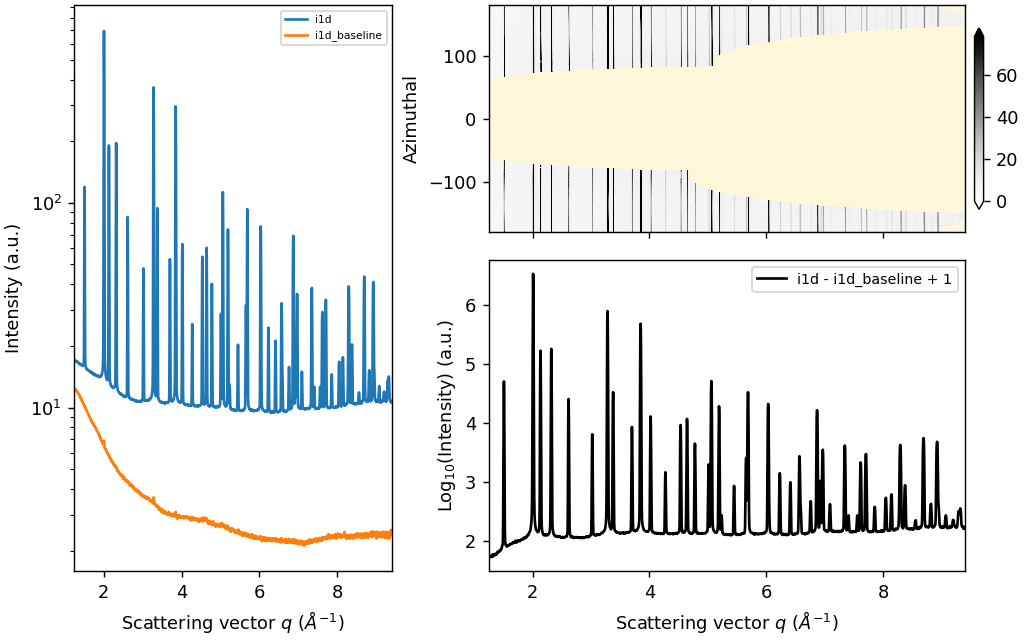

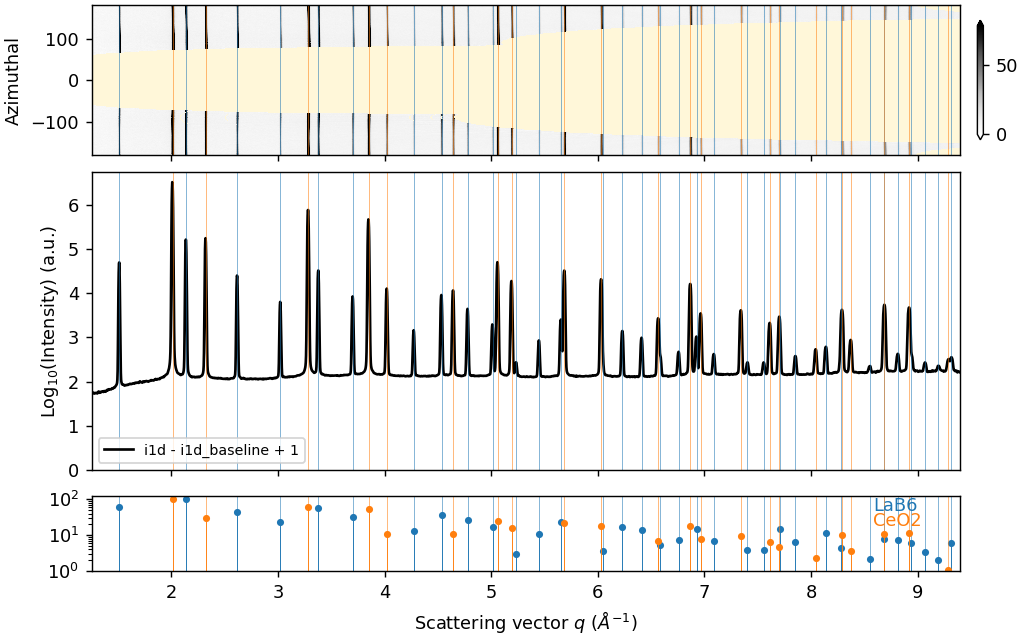

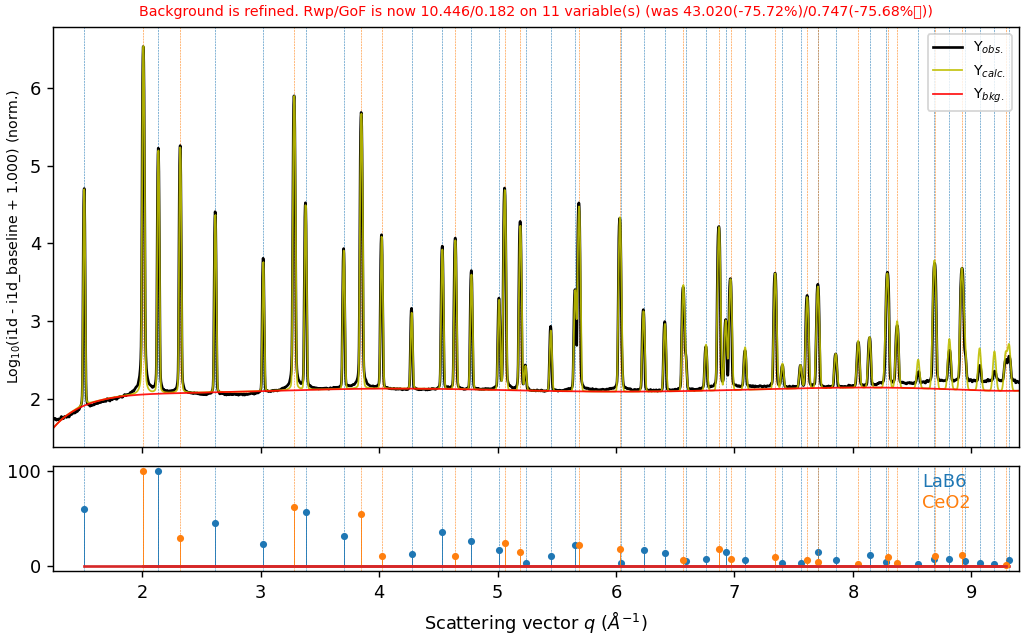

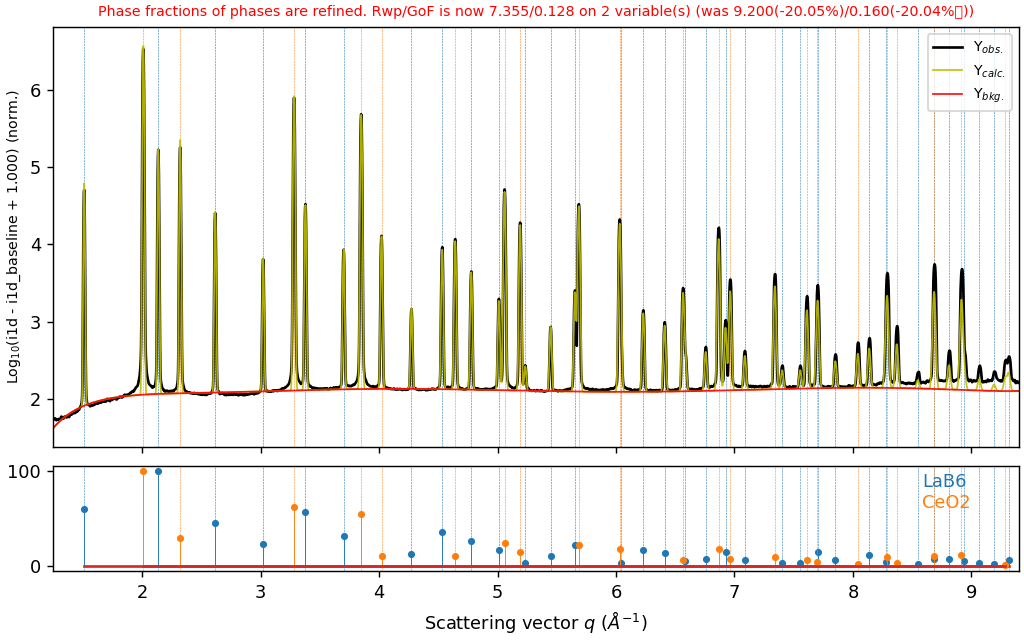

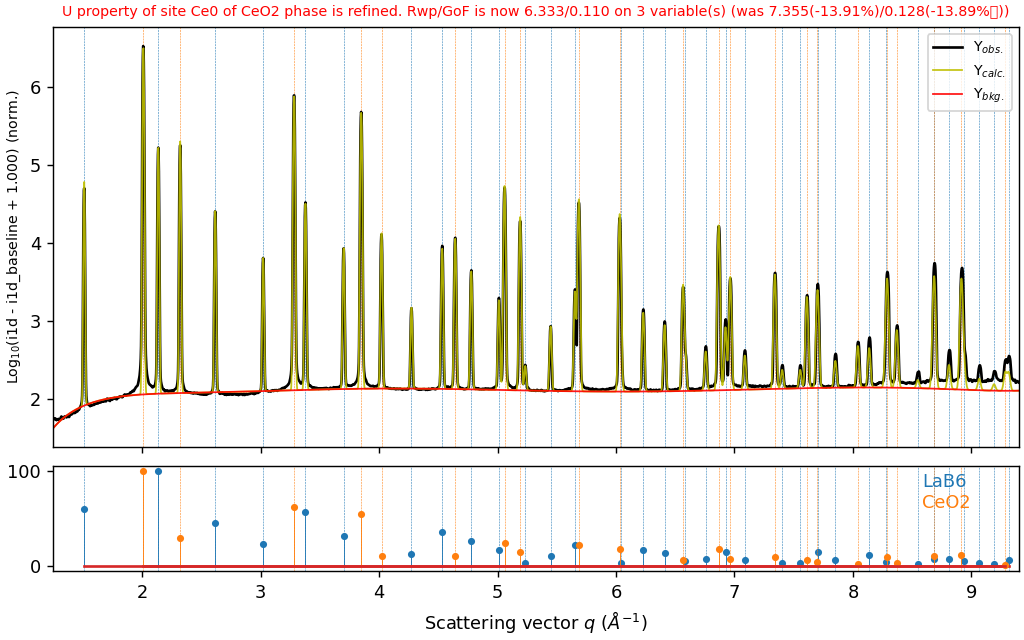

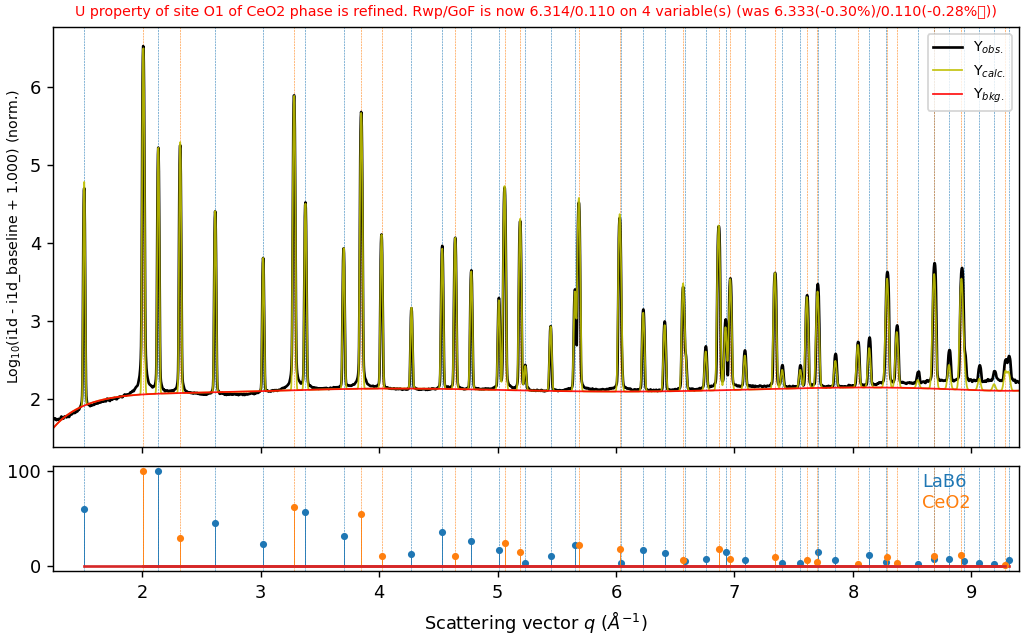

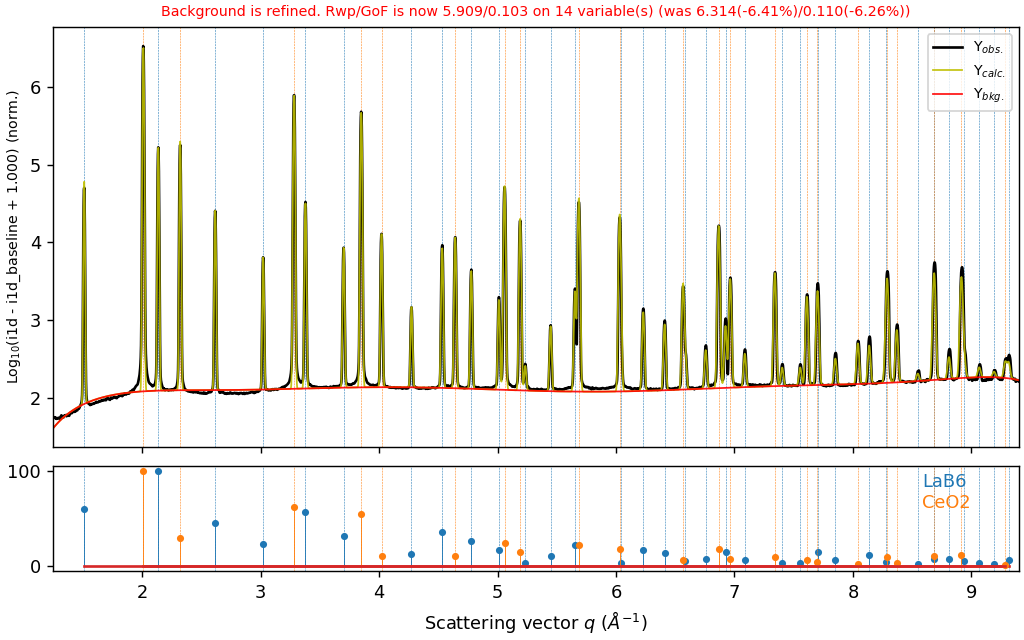

In [20]:
%%time

sample = deepcopy(sample_mix)
phases = phases_mix

sample.get_baseline(
    input_bkg=sample_Kapton,
    arpls_lam=1e7,
    use_arpls=False,
    get_i2d_baseline = False,
    use_i2d_baseline = False,
    roi_radial_range=[1.25, 9.4],
    spotty_data_correction=False,
    spotty_data_correction_threshold=2,
    plot=True,
)
sample.load_phases(phases=phases, plot=True)

# Refinements
sample.setup_gsas2_refiner(instprm_from_gpx="gsas_instprms.gpx",plot=False,normalize=True)
sample.refine_background(num_coeffs=10,plot=True)
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()

sample.set_LeBail(set_to=False, refine=True, plot=False)
sample.refine_phase_fractions(plot=True,set_to_false_after_refinement=False)
sample.refine_site_property(phase_ind=1,site_ind=0,refinement_flags='U',set_to_false_after_refinement=False)
sample.refine_site_property(phase_ind=1,site_ind=1,refinement_flags='U',set_to_false_after_refinement=False)
sample.refine_background(num_coeffs=10,plot=True)